# Deep Learning Fundamentals - LU03-B Lab Exercise

## 3.6 Load the saved MNIST dataset

In [1]:
import pickle

with open('MNIST_data.pickle', 'rb') as in_file:
    train_images, train_labels, test_images, test_labels = pickle.load(in_file)

## 3.7 Print the shape of train and test data for verification 

In [2]:
print("Train images shape: {}".format(train_images.shape))
print("Train labels shape: {}".format(train_labels.shape))
print("Test images shape: {}".format(test_images.shape))
print("Test labels shape: {}".format(test_labels.shape))

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)


## 3.8 Build and train the network

In [3]:
from keras import models
from keras import layers
from keras import losses

def classifier_model():
    network = models.Sequential()
    network.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))
    return network

model = classifier_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


### 3.8.1 Optimizers

In this section, you will explore the different optimizers on the training performance. Try to change the learning rate as well.

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/optimizers for the available optimizers in Tensorflow.

In [4]:
import numpy.random as nr

nr.seed(1305)

# Define the optimizer list (Feel free to change to other optimizers)
optimizers = ['SGD', 'RMSprop', 'adam']
history_cache = {}

for opt in optimizers:
    
    # Define the model
    model = classifier_model()

    # Compile using different optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)
    history_cache[opt] = history
    
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print('\nTest Acc ({}) - {:.4f}: \n'.format(opt, test_acc))

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 1788.2870 - accuracy: 0.1119 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epo

In [5]:
import matplotlib.pyplot as plt
def plot_loss(history_cache):
    plt.figure(figsize=(10, 8))
    for opt, history in history_cache.items():
        train_loss = history.history['loss']
        test_loss = history.history['val_loss']
        x = list(range(1, len(test_loss) + 1))
        plt.plot(x, test_loss, label='Val loss - {}'.format(opt))
        plt.plot(x, train_loss, label='Train loss - {}'.format(opt))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss over Epochs')
        plt.legend()
    plt.show()
    
def plot_accuracy(history_cache):
    plt.figure(figsize=(10, 8))
    for opt, history in history_cache.items():
        train_acc = history.history['accuracy']
        test_acc = history.history['val_accuracy']
        x = list(range(1, len(test_acc) + 1))
        plt.plot(x, test_acc, label='Val accuracy - {}'.format(opt))
        plt.plot(x, train_acc, label='Train accuracy - {}'.format(opt))  
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy over Epochs')  
        plt.legend()
    plt.show()

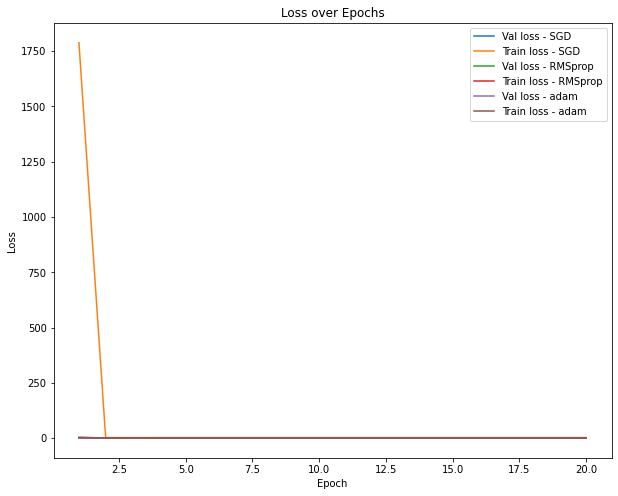

In [6]:
plot_loss(history_cache)  

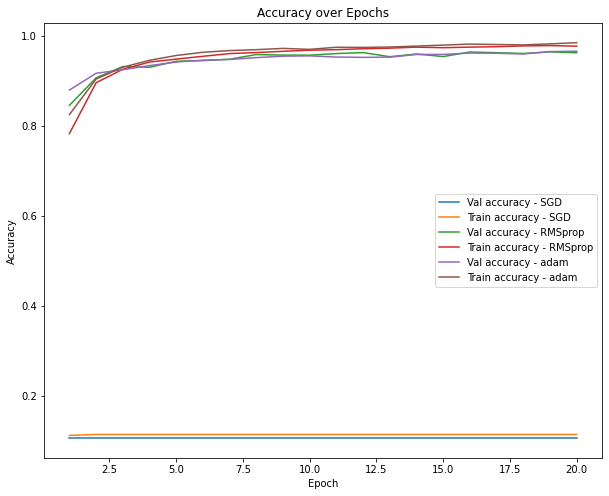

In [7]:
plot_accuracy(history_cache)

### 3.8.2 Dropout

In this section, you will include dropout into every layer in the model and explore different dropout rate on the training performance.

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout.

In [8]:
def classifier_dropout_model(dropout_rate):
    """Classifier model with dropout in every layer.
    
    :param dropout_rate: The rate for dropout
    :return: network
    """
    assert dropout_rate <= 1, 'Incorrect dropout rate specified.'
    network = models.Sequential()
    network.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    network.add(layers.Dropout(rate=dropout_rate))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dropout(rate=dropout_rate))
    network.add(layers.Dense(10, activation='softmax'))
    return network

model = classifier_dropout_model(dropout_rate=0.2)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
nr.seed(1305)

# Define the model
model = classifier_dropout_model(dropout_rate=0)

# Compile using different optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Acc: {:.4f}'.format(test_acc))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 3.1726 - accuracy: 0.8312 - val_loss: 0.7179 - val_accuracy: 0.8865
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5051 - accuracy: 0.9038 - val_loss: 0.4302 - val_accuracy: 0.9092
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3072 - accuracy: 0.9275 - val_loss: 0.3367 - val_accuracy: 0.9262
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2197 - accuracy: 0.9439 - val_loss: 0.3042 - val_accuracy: 0.9348
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1700 - accuracy: 0.9548 - val_loss: 0.2705 - val_accuracy: 0.9423
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1493 - accuracy: 0.9588 - val_loss: 0.2346 - val_accuracy: 0.9496
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1318 - accuracy: 0.9623 - val_loss: 0.2347 - val_accuracy: 0.9466
Epoch 

In [10]:
def plot_loss(history):
    plt.figure(figsize=(10, 8))
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.show()
    
def plot_accuracy(history):
    plt.figure(figsize=(10, 8))
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend()
    plt.show()

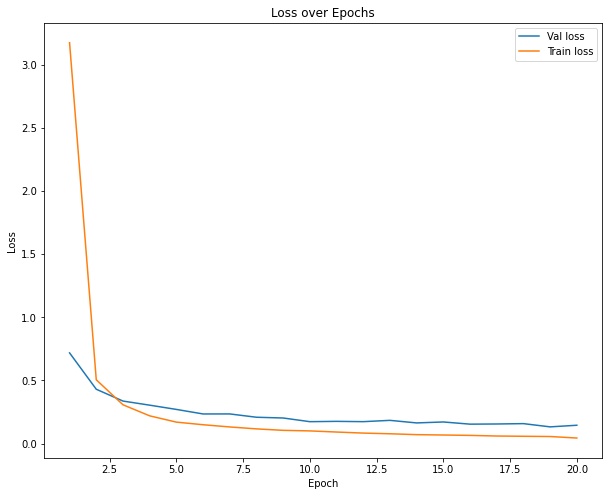

In [11]:
plot_loss(history)

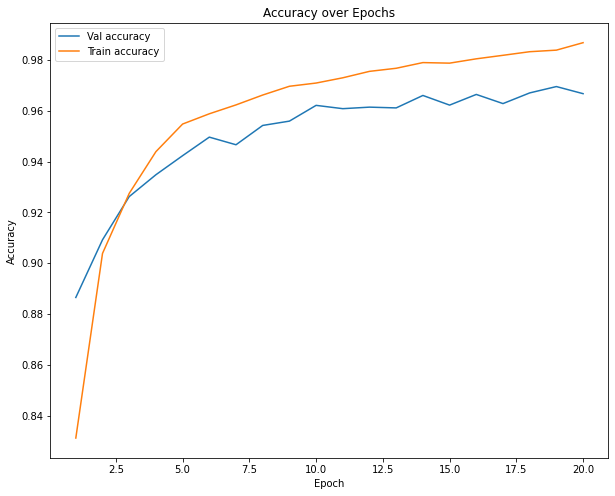

In [12]:
plot_accuracy(history)

### 3.8.2 Batchnorm

In this section, you will include batchnorm into every layer of the model and explore its impact on the training performance. Remember batchnorm are typically used before activation function. 

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization.

In [13]:
def classifier_batchnorm_model():
    """Classifier model with batch norm in every layer.
    
    :return: network
    """
    network = models.Sequential()
    network.add(layers.Dense(128, input_shape=(784,)))
    network.add(layers.BatchNormalization())
    network.add(layers.ReLU())
    network.add(layers.Dense(64))
    network.add(layers.BatchNormalization())
    network.add(layers.ReLU())
    network.add(layers.Dense(10, activation='softmax'))
    return network

model = classifier_batchnorm_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 64)               

In [14]:
nr.seed(1305)

# Define the model
model = classifier_batchnorm_model()

# Compile using different optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Acc: {:.4f}'.format(test_acc))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2942 - accuracy: 0.9201 - val_loss: 0.1320 - val_accuracy: 0.9632
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1034 - accuracy: 0.9694 - val_loss: 0.0983 - val_accuracy: 0.9711
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9802 - val_loss: 0.0893 - val_accuracy: 0.9734
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0498 - accuracy: 0.9852 - val_loss: 0.0952 - val_accuracy: 0.9727
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0790 - val_accuracy: 0.9767
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0768 - val_accuracy: 0.9767
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0858 - val_accuracy: 0.9741
Epoch 

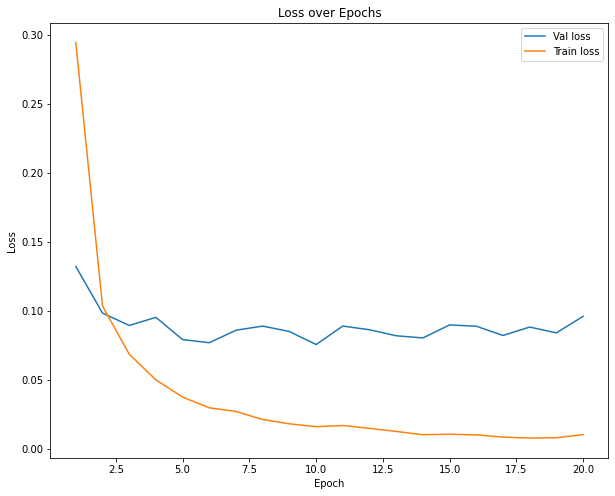

In [15]:
plot_loss(history)

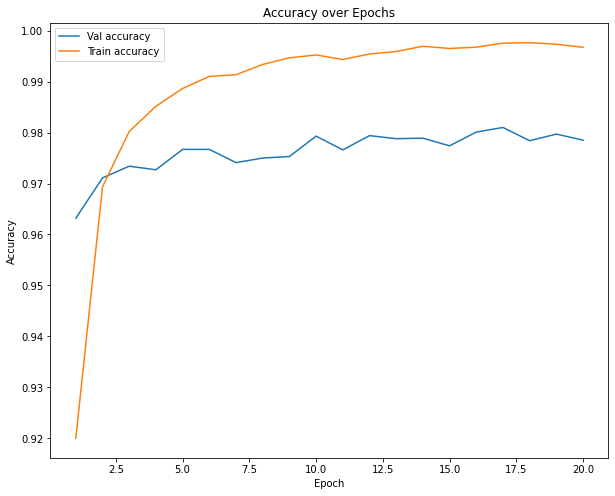

In [16]:
plot_accuracy(history)

### 3.8.3 Weights Initialization

In this section, you will change the weights initialization of every layer in the model and explore the differences on the training performance.

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/initializers.

In [17]:
def classifier_diff_wts_init_model():
    """Classifier model with different weights initialization in every layer.
    
    :return: network
    """
    network = models.Sequential()
    network.add(layers.Dense(128, input_shape=(784,), activation='relu', kernel_initializer='HeNormal'))
    network.add(layers.Dense(64, activation='relu', kernel_initializer='HeNormal'))
    network.add(layers.Dense(10, activation='softmax'))
    return network

model = classifier_diff_wts_init_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
nr.seed(1305)

# Define the model
model = classifier_diff_wts_init_model()

# Compile using different optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Acc: {:.4f}'.format(test_acc))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 3.8789 - accuracy: 0.8419 - val_loss: 1.0455 - val_accuracy: 0.9034
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6595 - accuracy: 0.9194 - val_loss: 0.6344 - val_accuracy: 0.9158
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.9381 - val_loss: 0.4499 - val_accuracy: 0.9331
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2467 - accuracy: 0.9504 - val_loss: 0.3425 - val_accuracy: 0.9418
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1963 - accuracy: 0.9577 - val_loss: 0.3483 - val_accuracy: 0.9408
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1621 - accuracy: 0.9619 - val_loss: 0.3449 - val_accuracy: 0.9450
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1397 - accuracy: 0.9661 - val_loss: 0.2662 - val_accuracy: 0.9540
Epoch 

### 3.8.4 Regularization

In this section, you will include the regularization in every layer in the model and explore the differences on the training performance.

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer.

In [19]:
from keras import regularizers

def classifier_reg_model(reg_type, lambd):
    """Classifier model with regularizations in every layer.
    
    :param reg_type: Regularization type
    :param lambd: Regularization constant
    :return: network
    """
    assert reg_type in ['L1', 'L2'], 'Incorrect norm type specified'
    if reg_type == 'L1':
        reg = regularizers.L1(lambd)
    elif reg_type == 'L2':
        reg = regularizers.L2(lambd)
    network = models.Sequential()
    network.add(layers.Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=reg))
    network.add(layers.Dense(64, activation='relu', kernel_regularizer=reg))
    network.add(layers.Dense(10, activation='softmax'))
    return network

model = classifier_reg_model(reg_type='L1', lambd=0.1)
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
nr.seed(1305)

# Define the model
model = classifier_reg_model(reg_type='L1', lambd=0.01)

# Compile using different optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Acc: {:.4f}'.format(test_acc))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 24.4363 - accuracy: 0.8262 - val_loss: 12.3883 - val_accuracy: 0.8948
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 7.5821 - accuracy: 0.9029 - val_loss: 4.2469 - val_accuracy: 0.9175
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 2.8389 - accuracy: 0.9105 - val_loss: 1.8791 - val_accuracy: 0.9174
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 1.4922 - accuracy: 0.9138 - val_loss: 1.1522 - val_accuracy: 0.9238
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0250 - accuracy: 0.9201 - val_loss: 0.9457 - val_accuracy: 0.9084
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.8367 - accuracy: 0.9219 - val_loss: 0.8126 - val_accuracy: 0.9185
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7566 - accuracy: 0.9256 - val_loss: 0.7144 - val_accuracy: 0.9293
Epoc

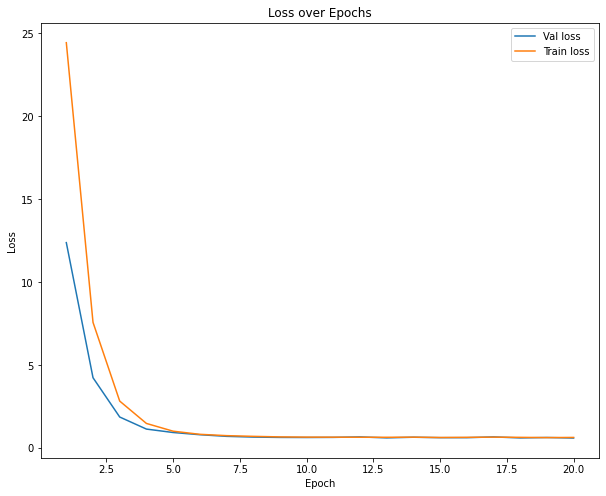

In [21]:
plot_loss(history)

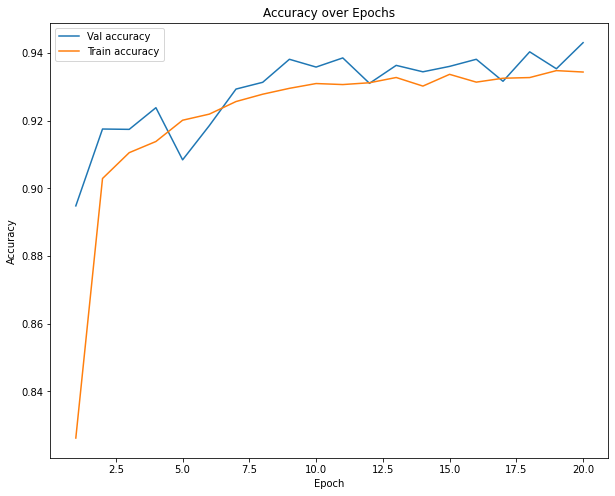

In [22]:
plot_accuracy(history)

### 3.8.5 Learning Rate Schedulers

In this section, you will include the learning rate scheduler during the compilation and explore the differences on the training performance.

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules.

In [23]:
def classifier_model():
    """Classifier model.

    :return: network
    """
    network = models.Sequential()
    network.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))
    return network

model = classifier_model()
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import ExponentialDecay

nr.seed(1305)

# Define the model
model = classifier_model()

# Define the learning rate scheduler
lr = 0.01
lr_schedule = ExponentialDecay(initial_learning_rate=lr, decay_steps=train_images.shape[0]/128, decay_rate=0.96)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile using different optimizer
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Acc: {:.4f}'.format(test_acc))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 4.5789 - accuracy: 0.7821 - val_loss: 0.4985 - val_accuracy: 0.8658
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4272 - accuracy: 0.8900 - val_loss: 0.3447 - val_accuracy: 0.9109
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3284 - accuracy: 0.9156 - val_loss: 0.3048 - val_accuracy: 0.9253
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2795 - accuracy: 0.9269 - val_loss: 0.3307 - val_accuracy: 0.9233
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.9318 - val_loss: 0.2586 - val_accuracy: 0.9341
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.9351 - val_loss: 0.3243 - val_accuracy: 0.9278
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.9381 - val_loss: 0.2785 - val_accuracy: 0.9305
Epoch 

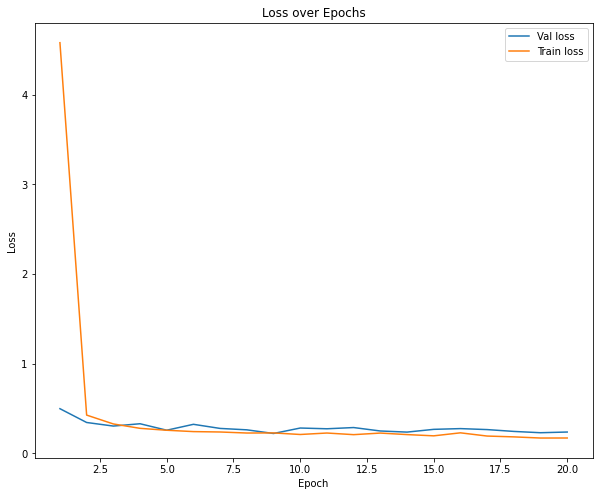

In [25]:
plot_loss(history)

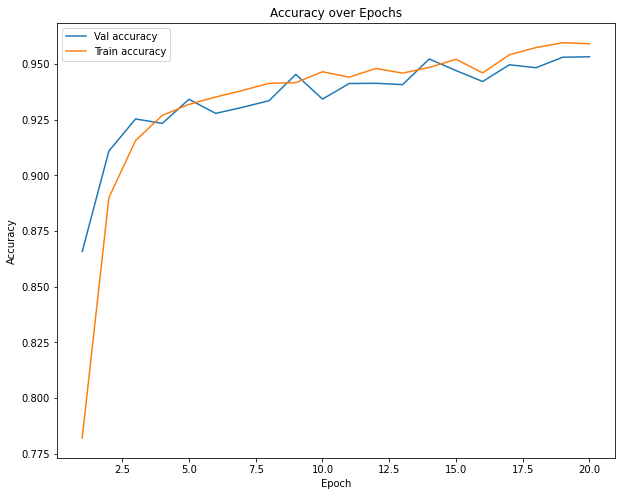

In [26]:
plot_accuracy(history)

## 3.9 Save the trained model

There are various ways of saving a trained model. The sections below depicts some common methods of saving the model.

### 3.9.1 Save to local drive using object method 'save'
This method saves the model after training.

In [27]:
model.save("MNIST_classifier_model_1.h5")

### 3.9.2 Save to local drive using callback method
This method saves the model every epoch.

In [28]:
# Define the model
model = classifier_model()

# Compile using adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the callback
callback = tf.keras.callbacks.ModelCheckpoint("MNIST_classifier_model_2_epoch_{epoch:02d}.h5", monitor='val_accuracy', save_best_only=True)

# Fit the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Acc: {:.4f}'.format(test_acc))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 2.9584 - accuracy: 0.8375 - val_loss: 0.6627 - val_accuracy: 0.8841
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4667 - accuracy: 0.9061 - val_loss: 0.4035 - val_accuracy: 0.9145
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2755 - accuracy: 0.9331 - val_loss: 0.3133 - val_accuracy: 0.9318
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2066 - accuracy: 0.9472 - val_loss: 0.2969 - val_accuracy: 0.9338
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1631 - accuracy: 0.9552 - val_loss: 0.2316 - val_accuracy: 0.9505
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1353 - accuracy: 0.9618 - val_loss: 0.2547 - val_accuracy: 0.9464
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1219 - accuracy: 0.9650 - val_loss: 0.2364 - val_accuracy: 0.9523
Epoch 

## 3.10 Your Exercise
We will try to randomly select an image from the mnist database and perform a prediction using your saved model


### 3.10.1 Build and save your model

Build your own model and integrate what you have learnt so far into your model.

In [29]:
from keras.models import load_model

# Load the model that you have saved earlier 
my_MNIST_model = load_model('MNIST_classifier_model_1.h5')

Randomly select 1 of of the MNIST image for prediction. Display the label of your selected image for validation. You can either select from your train_labels, test_labels or from original mnist dataset

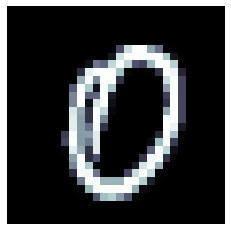

Actual label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
import random
import matplotlib.pyplot as plt

testID = random.randint(0, test_images.shape[0])

# Reshape the image
test_image = test_images[testID]
test_image_reshaped = test_image.reshape(1, -1)
test_label = test_labels[testID].reshape(1, -1)

display_image = test_image.reshape(28, 28)
plt.imshow(display_image, cmap='bone')
plt.axis('off')
plt.show()
print("Actual label: ",test_label[0])

Your prediction will show the probablities of all 10 values. Select the max probability to show the correct predicted value.
<br>
**HINT: use numpy.argmax(prediction)**

1/1 [==============================] - 0s 71ms/step


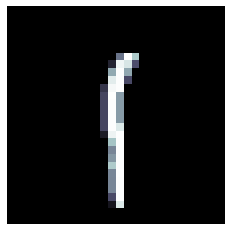

Predicted digit:  1


In [31]:
import numpy as np

rndIndex = random.randint(0, 10000)

test_image2 = train_images[rndIndex]
test_image2_reshaped = test_image2.reshape(1, -1)

pred_label2 = my_MNIST_model.predict(test_image2_reshaped)
display_image = test_image2.reshape(28, 28)
plt.imshow(display_image, cmap='bone')
plt.axis('off')
plt.show()

print("Predicted digit: ", np.argmax(pred_label2))